# Project: Investigate no show bookings in Brazil and understanding what metrics could possibly influence patient no show!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, we will be exploring the data collected from around 100,000 medical appointments in Brazil with the aim of identifying the key causes for patients to not show up to their appointments. We will be investigating the effects of the following 5 variables on the patients tendency to not show to their appointments: Age, Time difference between scheduled day and appointment day, Gender, SMS reminder and patients enrolment in Brasilian welfare programs.

In [657]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Using pandas library, we will be investigating the data set for null values, duplicated rows and any invalid dates (for example: if appointment date is before scheduled day

### General Properties

In [658]:
# Loading data from csv files and investigating the properties of different columns
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [659]:
# Check for nan values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [660]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values or duplicated rows in this data, however the dates are formated as strings and therefore we need to extract the ScheduledDay and AppointmentDay as datetime data type.

### Data Cleaning:

First we will have a look at the format of the 2 columns to start extracting the date.

In [662]:
# Slice Dates and times from ScheduledDay and AppointmentDay Columns
print(df["ScheduledDay"].head())
df["ScheduledDay"]=df.loc[:]["ScheduledDay"].str[:-10]
print(df["AppointmentDay"].head())
df["AppointmentDay"]=df.loc[:]["AppointmentDay"].str[:-10]

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object
0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object


After extracting the date from the string, we will now convert it to date time data type and then calculate the time difference between booking date and appointment date.

In [663]:
# Converting ScheduledDay and AppointmentDay columns to date time format
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

In [680]:
# Calculate difference between AppointmentDay and ScheduledDay
df["time_difference"]=df.loc[:]["AppointmentDay"]-df.loc[:]["ScheduledDay"]
# Convert time_differnce column to int
df["time_difference"]=df["time_difference"].dt.days
# Eliminate any invalid time difference and age with negative values
df=df[df["time_difference"]>=0]
df=df[df["Age"]>=0]

<a id='eda'></a>
## Exploratory Data Analysis

First of All we will be exploring the percentage show vs no show in the sample data.


In [665]:
# Change no-show status to 0 or 1 for easier filtering
df["No-show"]=df["No-show"].map(dict(Yes=1,No=0))

Percentage of no-show is equivalent to 20.0% of the total sample


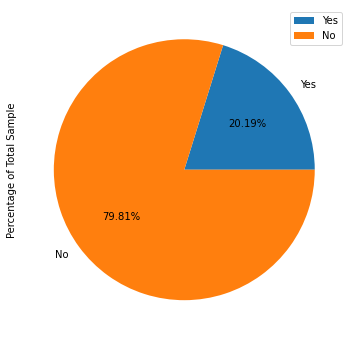

In [666]:
# % no-show
percentage_noshow=df["No-show"].sum()/df["No-show"].count()*100
percentage_show=100-percentage_noshow
df_noshowpercent=pd.DataFrame({"Percentage of Total Sample":[percentage_noshow,percentage_show]},index=["Yes","No"])
df_noshowpercent.plot.pie(y="Percentage of Total Sample",figsize=(6,6), autopct='%.2f%%');
print("Percentage of no-show is equivalent to {}% of the total sample".format(percentage_noshow.round(0)))

### Research Question 1: Effect of Health Status on Patient No Show

To investigate this question, we will create 2 data frames one for patients who showed up to their appointments and one for those who didn't show up. We will then investigate the health status distribution for both of these classes. There are four health statuses in this data: Hipertensioin, Diabetes, Alcoholism and Handicap.

In [667]:
# Creating a data frame for no show patients with percentage of each health status of total
total=df.query("`No-show`==1").sum()
count=df.query("`No-show`==1").count()
total.drop(["PatientId","AppointmentID","Age","Neighbourhood","Gender","time_difference","No-show","Scholarship","SMS_received"],inplace=True)
count.drop(["PatientId","AppointmentID","Age","Neighbourhood","Gender","time_difference","ScheduledDay","AppointmentDay","No-show","Scholarship","SMS_received"],inplace=True)
df_noshow=pd.DataFrame((total/count*100))
df_noshow.rename(columns={0:"no_show_percentage","Unnamed: 0":"Variable"},inplace=True)
df_noshow.head()

,no_show_percentage
Hipertension,16.9042
Diabetes,6.40853
Alcoholism,3.03397
Handcap,2.02115


In [668]:
# Creating a data frame for show patients with percentage of each health status of total
total_show=df.query("`No-show`==0").sum()
count_show=df.query("`No-show`==0").count()
total_show.drop(["PatientId","AppointmentID","Age","Neighbourhood","Gender","time_difference","No-show","Scholarship","SMS_received"],inplace=True)
count_show.drop(["PatientId","AppointmentID","Age","Neighbourhood","Gender","time_difference","ScheduledDay","AppointmentDay","No-show","Scholarship","SMS_received"],inplace=True)
df_show=pd.DataFrame((total_show/count_show*100))
df_show.rename(columns={0:"show_percentage","Unnamed: 0":"Variable"},inplace=True)
df_show.head()

,show_percentage
Hipertension,20.4394
Diabetes,7.38377
Alcoholism,3.04171
Handcap,2.2742


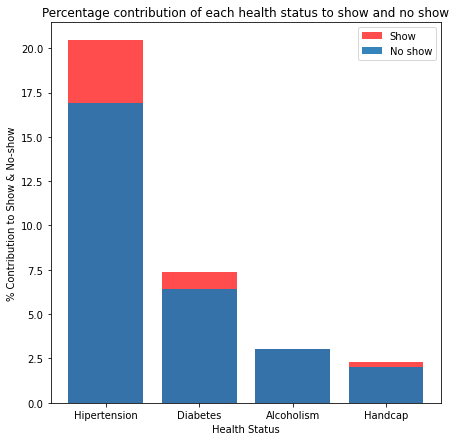

In [669]:
# Plotting each health status percentage for show vs no-show patients
plt.subplots(figsize=(7,7))
plt.bar(df_show.index,df_show["show_percentage"],alpha=0.7,color="red")
plt.bar(df_noshow.index,df_noshow["no_show_percentage"],alpha=0.9)
plt.legend(["Show","No show"])
plt.ylabel("% Contribution to Show & No-show")
plt.xlabel("Health Status")
plt.title("Percentage contribution of each health status to show and no show");

From the above plot we can deduce that Hypertension and Diabetic patients are more represented in the Show patients data, whereas the Alcoholism and Handicap are almost the same for show and No show patients. This indicates that diabetic and Hypertensive patients are more likely to show up to their appointments.

### Research Question 2: Effect of Age on Patient No Show

To investigate this question, we will be plotting the age distribution for no show vs show patients, in addition to calculating the mean for each class.

Average show age is 38, while Average no show age is 34


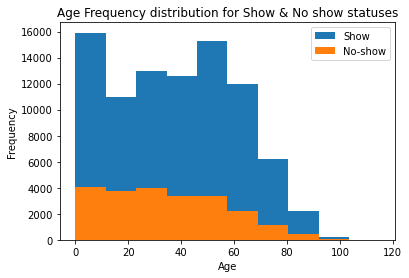

In [670]:
# Plotting Age distribution for show and no-show patients
df.groupby(df["No-show"]).Age.plot.hist();
plt.legend(["Show","No-show"]);
plt.xlabel("Age")
plt.title("Age Frequency distribution for Show & No show statuses")
# Calculating average Age for show and no-show patients
average_noshow_age=(df.query("`No-show`==1").Age.mean())
average_show_age=df.query("`No-show`==0").Age.mean()
print("Average show age is {:.0f}, while Average no show age is {:.0f}".format(average_show_age,average_noshow_age))

The age distribution for No show patients is slightly skewed to the left compared to that of show patients, indicating that younger population are more likely to miss out on doctors appointments. This is also confirmed by the mean age for each class.

### Research Question 3: Effect of time difference between booking and appointment day on Patient No show:

To investigate this we will be using histogram plots and mean comparisons of time difference data between no show and show patients.

Average time difference between scheduled day and appointment day for show patients is 9 days, 
while Average time difference for no show patients is 16 days


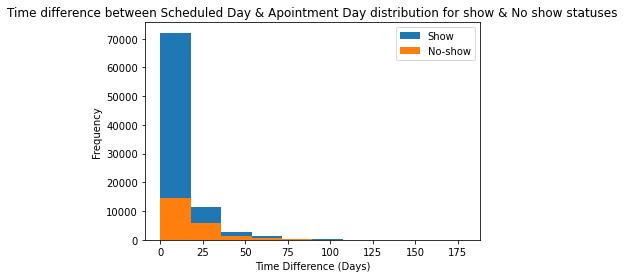

In [695]:
# Plotting time difference between scheduled day and appointment day for show and no-show patients
df.groupby(df["No-show"]).time_difference.plot.hist();
plt.legend(["Show","No-show"])
plt.xlabel("Time Difference (Days)")
plt.title("Time difference between Scheduled Day & Apointment Day distribution for show & No show statuses");
# Calculating average time difference between scheduled day and appointment day for show and no-show patients
average_noshow_time_difference=df.query("`No-show`==1").time_difference.mean()
average_show_time_difference=df.query("`No-show`==0").time_difference.mean()
print("Average time difference between scheduled day and appointment day for show patients is {:.0f} days, \nwhile Average time difference for no show patients is {:.0f} days".format(average_show_time_difference,average_noshow_time_difference))


The histogram plots for show patients are skewed to the right and the mean time difference for no show patients is much higher than that of show patients. This indicates that the smaller the time difference between booking day and appointment day, the more likely it is that the patient would show up.

### Research Question 4: Effect of Gender on Patient No show:

To investigate this we will be using bar plots comparison between male and female no show percentage

In [687]:
# Define function to calculate percentage no show per variable
def no_show_per_variable(x,y,z):
    total_noshow_per_variable=df.groupby(df[x])["No-show"].sum()
    total_per_variable=df.groupby(df[x])["No-show"].count()
    percentage_per_variable=(total_noshow_per_variable/total_per_variable)*100
    no_show_per_variable=percentage_per_variable.round(0)
    no_show_per_variable.set_axis([y,z],inplace=True)
    return no_show_per_variable
 
    
# Calculate percentage no show per gender    
no_show_per_gender=no_show_per_variable("Gender","Females","Males")

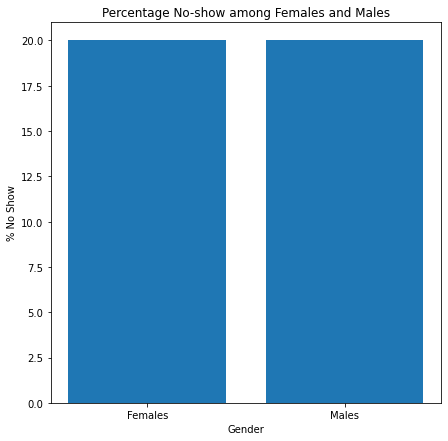

In [688]:
# Plotting Gender distribution for no-show patients
plt.subplots(figsize=(7,7))
plt.bar(no_show_per_gender.index,no_show_per_gender);
plt.ylabel("% No Show")
plt.xlabel("Gender")
plt.title("Percentage No-show among Females and Males");

Percentage of Males and Females who do not show up from the total Males and Females sample is almost equal at 20% indicating that gender is not a significant factor in determining patient's likeliness to show up to their appointments.

### Research Question 5: Effect of SMS Notifications on Patient No show:

To investigate this we will be using bar plots comparison of no show percenage of patients who received SMS versus those who did not receive it.

In [690]:
# Calculating percentage of no-show for patients who received SMS versus those who did not receive it
no_show_per_sms=no_show_per_variable("SMS_received","No","Yes")

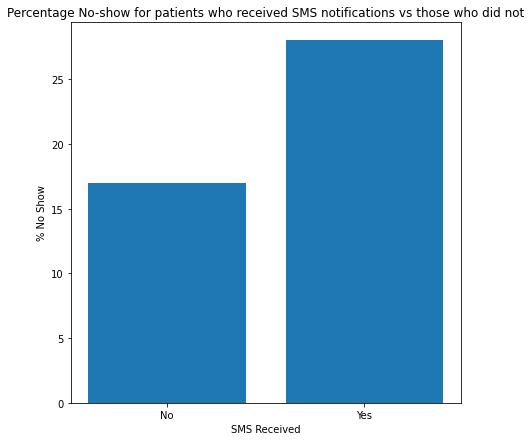

In [691]:
# Plotting no show patients for those who received SMS vs those who did not
plt.subplots(figsize=(7,7))
plt.bar(no_show_per_sms.index,no_show_per_sms);
plt.ylabel("% No Show");
plt.xlabel("SMS Received");
plt.title("Percentage No-show for patients who received SMS notifications vs those who did not");

On contrary to what is expected, the SMS notifications correlate with much higher no show percentage by around 10%.

### Research Question 6: Effect of enrollment in Brazilian Welfare Program on Patient No show:

To investigate this we will be using bar plots comparison of no show percenage of patients who are enrolled in the welfare program versus those who are not.

In [692]:
# Calculating percentage of no-show for patients who are enrolled in the welfare program versus those who are not
no_show_per_scholarship=no_show_per_variable("Scholarship","No","Yes")

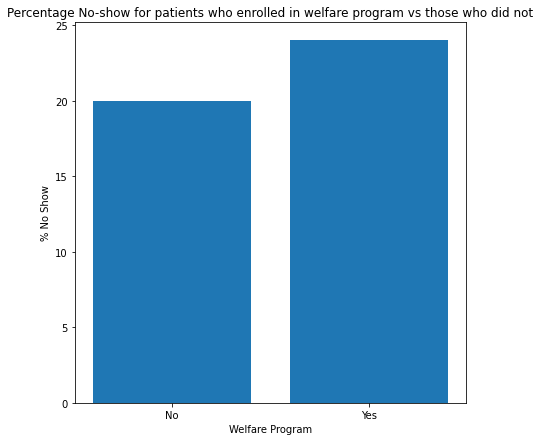

In [693]:
# Plotting no show patients for those who are enrolled in the program versus those who are not
plt.subplots(figsize=(7,7))
plt.bar(no_show_per_scholarship.index,no_show_per_scholarship);
plt.ylabel("% No Show");
plt.xlabel("Welfare Program");
plt.title("Percentage No-show for patients who enrolled in welfare program vs those who did not");

Enrolment in welfare program correlates with higher tendency for not showing to the appointments. As % no show of those enrolled in the scholarship program is higher by 4% compared to those who are not enrolled.

<a id='conclusions'></a>
## Conclusions

In this report we have explored the correlation between no show and 6 variables: Health Status, Age, Time difference between booking and appointment day, Gender, SMS notifications and enrolment in Brazilian welfare program. In conclusion, lower no show percentages were shown in patients who are hypertensive or diabetic, while no significant differene was shown in alcoholism or handicaped patients. Moreover, no-show correlates with younger population and longer time difference between appointment day and booking day. In addition the Brazilian Welfare Program and the SMS notifications tend to correlate with higher no show percentage. Finally, Gender seemed as an insiginficant factor in determining patient's tendency for no show. The limitations of this study is the lack of information with regard to how this data was collected and on what basis was the sample chosen and if this sample is representative of the Brazilian population.